# Prerequisite

## Install for Google Colab

## install wfdb library

In [1]:
%pip install wfdb

Note: you may need to restart the kernel to use updated packages.


## Import

In [2]:
import pandas as pd
import numpy as np

# Matplotlib
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

# Read file
import os

# Read ECG and Respiratory File
import wfdb
from wfdb import processing


## Constant

In [3]:
data_folder_path = "./data/"

# Data Preparation

## Download Data

In [4]:
wfdb.dl_database(db_dir='picsdb', dl_dir=data_folder_path, records='all', annotators='all', keep_subdirs=False, overwrite=False)

Generating record list for: infant10_ecg
Generating record list for: infant10_resp
Generating record list for: infant1_ecg
Generating record list for: infant1_resp
Generating record list for: infant2_ecg
Generating record list for: infant2_resp
Generating record list for: infant3_ecg
Generating record list for: infant3_resp
Generating record list for: infant4_ecg
Generating record list for: infant4_resp
Generating record list for: infant5_ecg
Generating record list for: infant5_resp
Generating record list for: infant6_ecg
Generating record list for: infant6_resp
Generating record list for: infant7_ecg
Generating record list for: infant7_resp
Generating record list for: infant8_ecg
Generating record list for: infant8_resp
Generating record list for: infant9_ecg
Generating record list for: infant9_resp
Generating list of all files for: infant10_ecg
Generating list of all files for: infant10_resp
Generating list of all files for: infant1_ecg
Generating list of all files for: infant1_resp


## Read File

In [5]:
# infant_id = 1
ecg_path = []
resp_path = []
ecg_data = []
resp_data = []
for infant_id in range(1, 11):
    ecg_path.append(os.path.join(data_folder_path, f"infant{infant_id}_ecg"))
    resp_path.append(os.path.join(data_folder_path, f"infant{infant_id}_resp"))

    ecg_data.append(wfdb.rdrecord(ecg_path[infant_id-1]))
    resp_data.append(wfdb.rdrecord(resp_path[infant_id-1]))
    
print(ecg_path)
print(resp_path)

['./data/infant1_ecg', './data/infant2_ecg', './data/infant3_ecg', './data/infant4_ecg', './data/infant5_ecg', './data/infant6_ecg', './data/infant7_ecg', './data/infant8_ecg', './data/infant9_ecg', './data/infant10_ecg']
['./data/infant1_resp', './data/infant2_resp', './data/infant3_resp', './data/infant4_resp', './data/infant5_resp', './data/infant6_resp', './data/infant7_resp', './data/infant8_resp', './data/infant9_resp', './data/infant10_resp']


### Analyse File

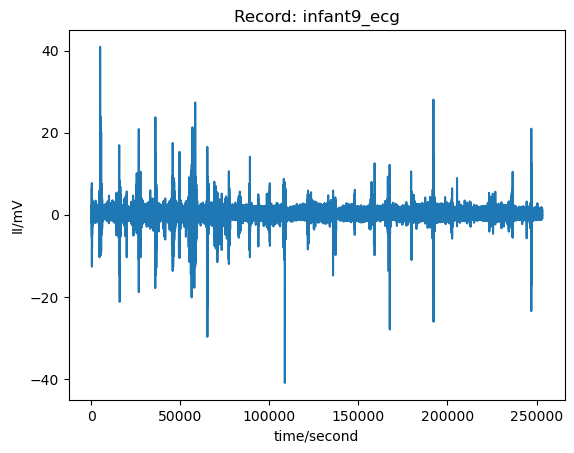

In [6]:
wfdb.plot_wfdb(record=ecg_data[8])

In [7]:
signals, fields = wfdb.rdsamp(ecg_path[0])

In [8]:
signals

array([[-0.01998352],
       [-0.01998352],
       [-0.01498764],
       ...,
       [-0.31474046],
       [-0.07868511],
       [ 0.33597295]])

In [9]:
fields

{'fs': 250,
 'sig_len': 41052191,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['ECG'],
 'comments': []}

In [10]:
# Extra informations
record = wfdb.rdheader(ecg_path[0])
record.__dict__

{'record_name': 'infant1_ecg',
 'n_sig': 1,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 41052191,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': None,
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['infant1_ecg.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [800.6597],
 'baseline': [28],
 'units': ['mV'],
 'adc_res': [0],
 'adc_zero': [0],
 'init_value': [12],
 'checksum': [-25872],
 'block_size': [0]}

## Peak detection

C:\Users\nmajid4\AppData\Local\Temp\ipykernel_21760\2951821436.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rx" (-> marker='x'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',
C:\Users\nmajid4\AppData\Local\Temp\ipykernel_21760\2951821436.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x',


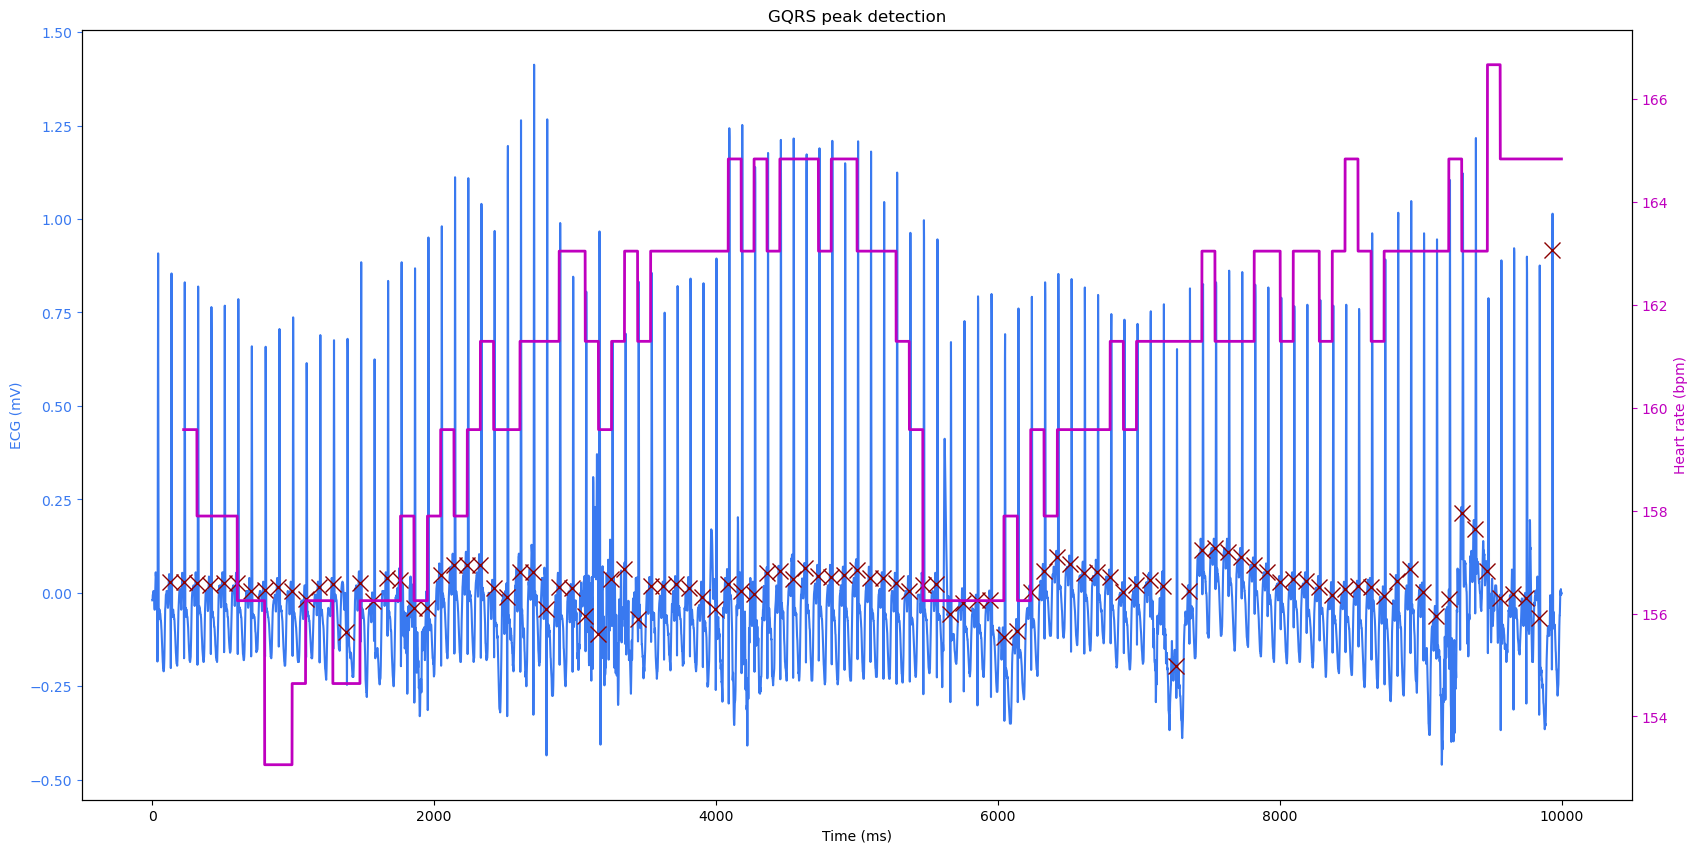

Corrected GQRS detected peak indices: [136, 230, 325, 419, 514, 610, 706, 804, 902, 999, 1095, 1192, 1289, 1385, 1482, 1577, 1673, 1769, 1864, 1959, 2054, 2148, 2242, 2335, 2429, 2523, 2616, 2709, 2802, 2894, 2986, 3079, 3173, 3266, 3358, 3451, 3544, 3635, 3727, 3819, 3911, 4003, 4094, 4186, 4277, 4369, 4460, 4551, 4643, 4734, 4825, 4916, 5008, 5100, 5193, 5285, 5379, 5475, 5571, 5667, 5763, 5859, 5955, 6051, 6146, 6241, 6335, 6429, 6523, 6617, 6711, 6805, 6898, 6991, 7085, 7178, 7271, 7363, 7456, 7548, 7641, 7734, 7826, 7919, 8011, 8103, 8196, 8288, 8380, 8472, 8563, 8656, 8749, 8841, 8933, 9024, 9116, 9208, 9300, 9392, 9481, 9573, 9663, 9754, 9845, 9936]


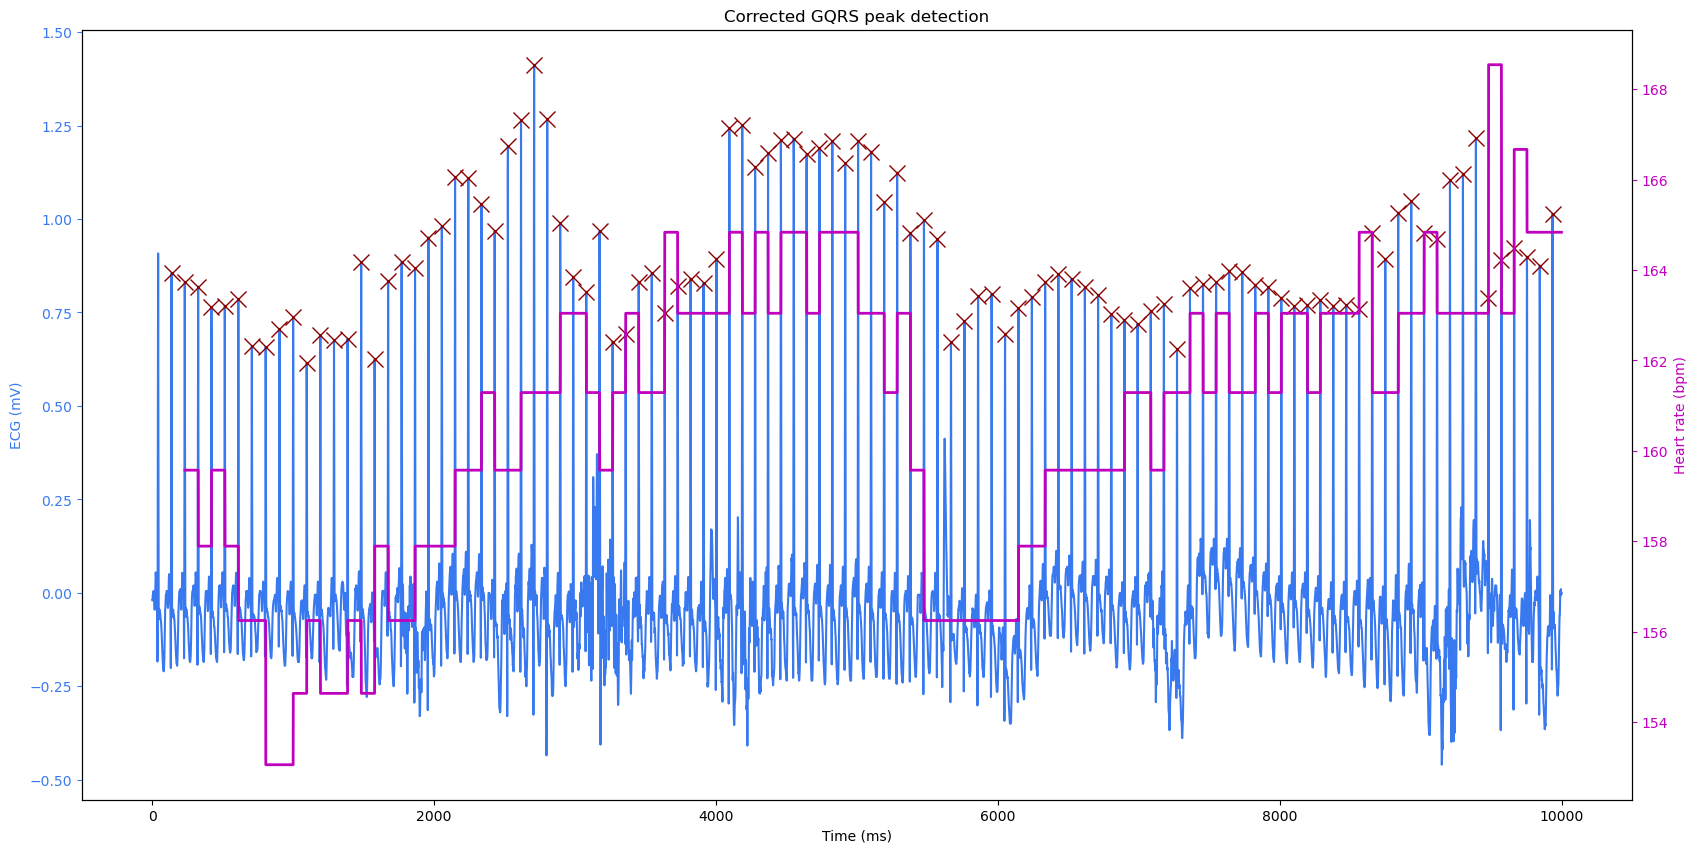

In [11]:

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord(ecg_path[0], sampfrom=0, sampto=10000, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection")

# Data Preprocessing

Analysis from dataset:

-For ECG data, infant 1 & 5 have frequency of 250Hz while the rest has 500Hz

-For Resp data, infant 1 has frequency of 500Hz while the rest has 50Hz

To avoid data leakage, split data into training, validation and test sets using ratio 6:2:2.
The splitting is based on infant number.

In [12]:
#FOR TRAINING
#for infants 2,3,4,6,7,8 (6 infants in total)
ecg_path_training = []
resp_path_training = []

ecg_data_training = []
resp_data_training = []

training_infants = [2,3,4,6,7,8]
for infant_id in training_infants:
    ecg_path_training.append(os.path.join(data_folder_path, f"infant{infant_id}_ecg"))
    resp_path_training.append(os.path.join(data_folder_path, f"infant{infant_id}_resp"))

    ecg_data_training.append(wfdb.rdrecord(ecg_path[infant_id-1]))
    resp_data_training.append(wfdb.rdrecord(resp_path[infant_id-1]))
    
print(ecg_path_training)
print(resp_path_training)

['./data/infant2_ecg', './data/infant3_ecg', './data/infant4_ecg', './data/infant6_ecg', './data/infant7_ecg', './data/infant8_ecg']
['./data/infant2_resp', './data/infant3_resp', './data/infant4_resp', './data/infant6_resp', './data/infant7_resp', './data/infant8_resp']


In [13]:
#FOR VALIDATION
#for infants 9,10
ecg_path_validation = []
resp_path_validation = []

ecg_data_validation = []
resp_data_validation = []

validation_infants = [9,10]
for infant_id in validation_infants:
    ecg_path_validation.append(os.path.join(data_folder_path, f"infant{infant_id}_ecg"))
    resp_path_validation.append(os.path.join(data_folder_path, f"infant{infant_id}_resp"))

    ecg_data_validation.append(wfdb.rdrecord(ecg_path[infant_id-1]))
    resp_data_validation.append(wfdb.rdrecord(resp_path[infant_id-1]))
    
print(ecg_path_validation)
print(resp_path_validation)

['./data/infant9_ecg', './data/infant10_ecg']
['./data/infant9_resp', './data/infant10_resp']


In [16]:
#FOR TESTING
#for infant 1 & 5 with 250Hz ECG (2 infants in total)
ecg_path_testing = []
resp_path_testing = []

ecg_data_testing = []
resp_data_testing = []

testing_infants = [1,5]
for infant_id in testing_infants:
    ecg_path_testing.append(os.path.join(data_folder_path, f"infant{infant_id}_ecg"))
    resp_path_testing.append(os.path.join(data_folder_path, f"infant{infant_id}_resp"))

    ecg_data_testing.append(wfdb.rdrecord(ecg_path[infant_id-1]))
    resp_data_testing.append(wfdb.rdrecord(resp_path[infant_id-1]))
    
print(ecg_path_testing)
print(resp_path_testing)

['./data/infant1_ecg', './data/infant5_ecg']
['./data/infant1_resp', './data/infant5_resp']


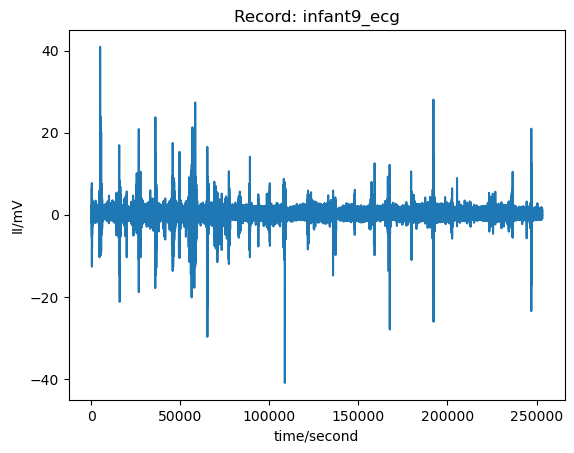

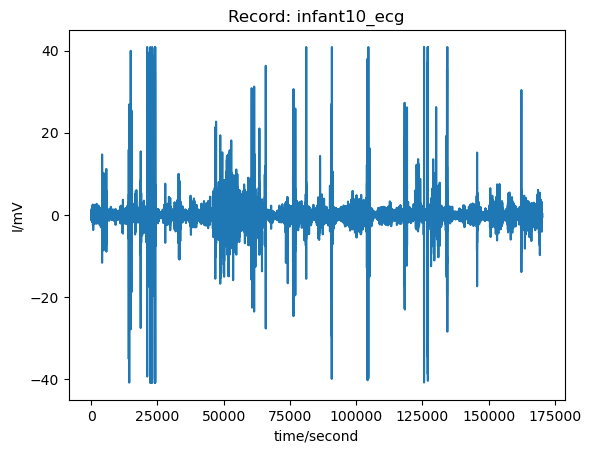

In [22]:
num=0
for i in ecg_data_validation:
    wfdb.plot_wfdb(record=ecg_data_validation[num])
    num+=1

Mapping: Finding Time-shift Between Two Timeseries for Maximum Correlation

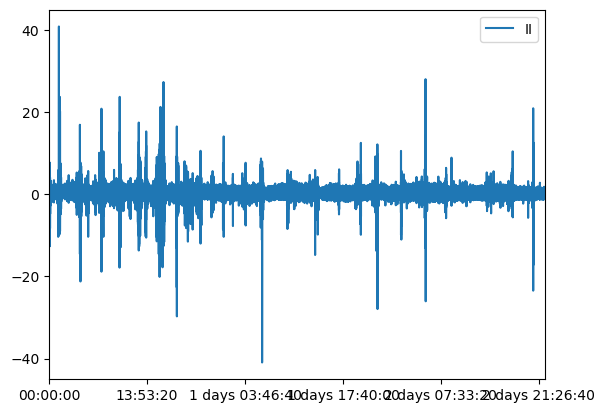

In [23]:
record = ecg_data_validation[0]
df = record.to_dataframe()
df.plot();

In [24]:
df

,II
0 days 00:00:00,0.000000
0 days 00:00:00.002000,-0.034971
0 days 00:00:00.004000,-0.039967
0 days 00:00:00.006000,-0.039967
0 days 00:00:00.008000,-0.034971
...,...
2 days 22:18:58.166000,-0.118652
2 days 22:18:58.168000,-0.128644
2 days 22:18:58.170000,-0.138636
2 days 22:18:58.172000,-0.147378


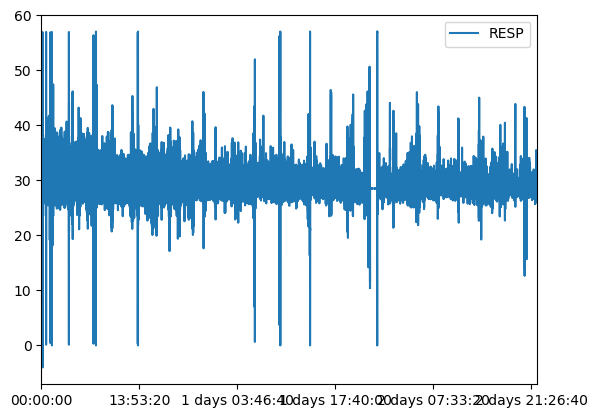

In [25]:
recordresp = resp_data_validation[0]
dfresp = recordresp.to_dataframe()
dfresp.plot();

In [26]:
dfresp

,RESP
0 days 00:00:00,28.528428
0 days 00:00:00.020000,28.529360
0 days 00:00:00.040000,28.531223
0 days 00:00:00.060000,28.529360
0 days 00:00:00.080000,28.531223
...,...
2 days 22:18:55.580000,28.731557
2 days 22:18:55.600000,28.683104
2 days 22:18:55.620000,28.717580
2 days 22:18:55.640000,28.613220
